# Decision Tree
1. What is a Decision Tree, and how does it work?
  - A Decision Tree is a flowchart-like structure used for decision-making and classification/regression tasks. It splits the dataset into branches based on features to make predictions.
    - Root Node: Top decision.
    - Internal Nodes: Test on features.
    - Leaves: Final output/class.
2. What are impurity measures in Decision Trees ?
  - Impurity measures show how mixed or "impure" the data is in a node. The goal is to split data such that each resulting node is as "pure" as possible (i.e., contains mainly one class).
    - Common impurity measures:
    - Gini Impurity
    - Entropy Variance (for regression)
3. What is the mathematical formula for Gini Impurity?
  - Gini=1−
i=1
∑
C
​
 p
i
2
​

4. What is the mathematical formula for Entropy?
  - Entropy=−
i=1
∑
C
​
 p
i
​
 log
2
​
 (p
i
​
 )
5. What is Information Gain, and how is it used in Decision Trees ?
  - Information Gain measures the reduction in impurity after a split.

𝐼
𝑛
𝑓
𝑜
𝑟
𝑚
𝑎
𝑡
𝑖
𝑜
𝑛

𝐺
𝑎
𝑖
𝑛
=
𝐼
𝑚
𝑝
𝑢
𝑟
𝑖
𝑡
𝑦
𝑝
𝑎
𝑟
𝑒
𝑛
𝑡
−
∑
𝑘
=
1
𝐾
𝑛
𝑘
𝑛
⋅
𝐼
𝑚
𝑝
𝑢
𝑟
𝑖
𝑡
𝑦
𝑘
Information Gain=Impurity
parent
​
 −
k=1
∑
K
​
  
n
n
k
​

​
 ⋅
6. What is the difference between Gini Impurity and Entropy?
  - Gini Impurity
    - 1−∑p
i
2
​

    - Faster to compute
    - Similar decisions in practice
  - Entropy
    - −∑p
i
​
 log
2
​
 p
i
​

    - 	Slightly slower
    - Sometimes prefers pure splits
7. What is the mathematical explanation behind Decision Trees?
  - A Decision Tree builds recursively:
    - Select a feature that gives maximum Information Gain or minimum impurity
    - Split the dataset based on that feature.
    - Repeat for each child node until a stopping condition (e.g., pure node or depth limit) is met.


8. What is Pre-Pruning in Decision Trees?
  - Pre-pruning stops the tree from growing too large before it fully develops, using rules like:
    - Max depth
    - Min samples per leaf
    - Min impurity decrease
9. What is Post-Pruning in Decision Trees?
  - Post-pruning grows the full tree first, then removes branches that do not improve accuracy (often using a validation set).
10. What is the difference between Pre-Pruning and Post-Pruning?
  - Pre-Pruning
    - During tree building
    - Prevent overfitting early
    - Underfitting
  
  - Post-Pruning
    - After full tree is built
    - Simplify overfit tree
    - More accurate but slower


11. What is a Decision Tree Regressor?
  - It’s a type of Decision Tree used for regression tasks (predicting continuous values). Splits are made to minimize variance (MSE), not classification impurity.
12. What are the advantages and disadvantages of Decision Trees?
  - Advantages:
    - Easy to understand
    - Works for classification & regression
    - No need for feature scaling
    - Can handle both numerical & categorical data
  - Disadvantages:
    - Prone to overfitting
    - Can be unstable (small changes affect structure)
    - Biased toward features with more levels
13. How does a Decision Tree handle missing values?
  - It may ignore missing during split calculations.
  - Use surrogate splits (backup rules).
  - Some implementations impute missing values before training.
14. How does a Decision Tree handle categorical features?
  - Splits are made based on category values.
  - For example, split on "Color = Red", or group categories to reduce impurity
  - Some implementations convert categories to one-hot encoding first.
15. What are some real-world applications of Decision Trees?
  - Medical Diagnosis (disease prediction)
  - Credit Scoring (loan approval)
  - Marketing (customer segmentation)
  - Fraud Detection
  - Retail (product recommendation)

In [31]:
#16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [32]:
#17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

print("Feature Importances:", model.feature_importances_)


Feature Importances: [0.01911002 0.         0.89326355 0.08762643]


In [33]:
#18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy (Entropy):", accuracy_score(y_test, y_pred))


Accuracy (Entropy): 1.0


In [34]:
#19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.5188407870067182


In [47]:
#20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import train_test_split

# 1. Load Iris and split
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2. Train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 3. Export to Graphviz format
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)

# 4. Render and save as PNG
graph = graphviz.Source(dot_data)
graph.render("iris_tree", format='png', cleanup=True)
print("Tree visual saved as 'iris_tree.png'.")



Tree visual saved as 'iris_tree.png'.


In [48]:
#21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load Iris and split into train/test (class labels 0,1,2)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# 2. Train a fully grown tree
tree_full = DecisionTreeClassifier()
tree_full.fit(X_train, y_train)

# 3. Train a tree with max_depth=3
tree_limited = DecisionTreeClassifier(max_depth=3)
tree_limited.fit(X_train, y_train)

# 4. Compare accuracies
full_acc    = accuracy_score(y_test, tree_full.predict(X_test))
limited_acc = accuracy_score(y_test, tree_limited.predict(X_test))

print(f"Full Tree Accuracy:    {full_acc:.3f}")
print(f"Depth=3 Tree Accuracy: {limited_acc:.3f}")

Full Tree Accuracy:    1.000
Depth=3 Tree Accuracy: 1.000


In [49]:
#22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load Iris and split (classes 0,1,2)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# 2. Train default and min_samples_split=5 trees
default_tree = DecisionTreeClassifier()
split_tree   = DecisionTreeClassifier(min_samples_split=5)

default_tree.fit(X_train, y_train)
split_tree.fit(X_train, y_train)

# 3. Compute and compare accuracies
acc_default = accuracy_score(y_test, default_tree.predict(X_test))
acc_split   = accuracy_score(y_test, split_tree.predict(X_test))

print(f"Default Tree Accuracy:        {acc_default:.3f}")
print(f"min_samples_split=5 Accuracy: {acc_split:.3f}")




Default Tree Accuracy:        1.000
min_samples_split=5 Accuracy: 1.000


In [50]:
# 23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Load Iris and split into train/test (discrete class labels)
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2. Train on unscaled data
unscaled_model = DecisionTreeClassifier()
unscaled_model.fit(X_train, y_train)
y_pred_unscaled = unscaled_model.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# 3. Scale features (fit scaler on train only, then transform both)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# 4. Train on scaled data
scaled_model = DecisionTreeClassifier()
scaled_model.fit(X_train_s, y_train)
y_pred_scaled = scaled_model.predict(X_test_s)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# 5. Print comparison
print(f"Unscaled Accuracy: {acc_unscaled:.3f}")
print(f"Scaled Accuracy:   {acc_scaled:.3f}")



Unscaled Accuracy: 1.000
Scaled Accuracy:   1.000


In [51]:
#24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# 1. Load Iris and split so y is discrete species labels
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# 2. Wrap DecisionTree in a One-vs-Rest meta-estimator
ovr_model = OneVsRestClassifier(DecisionTreeClassifier())

# 3. Train and predict
ovr_model.fit(X_train, y_train)
y_pred = ovr_model.predict(X_test)

# 4. Evaluate
print("OvR Accuracy:", accuracy_score(y_test, y_pred))



OvR Accuracy: 1.0


In [41]:
#25.Write a Python program to train a Decision Tree Classifier and display the feature importance scores
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

for name, importance in zip(iris.feature_names, model.feature_importances_):
    print(f"{name}: {importance:.2f}")


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [52]:
#26.Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. Load Iris and split into train/test (discrete class labels)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# 2. Train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 3. Display feature importances
for name, importance in zip(iris.feature_names, model.feature_importances_):
    print(f"{name}: {importance:.4f}")

sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876


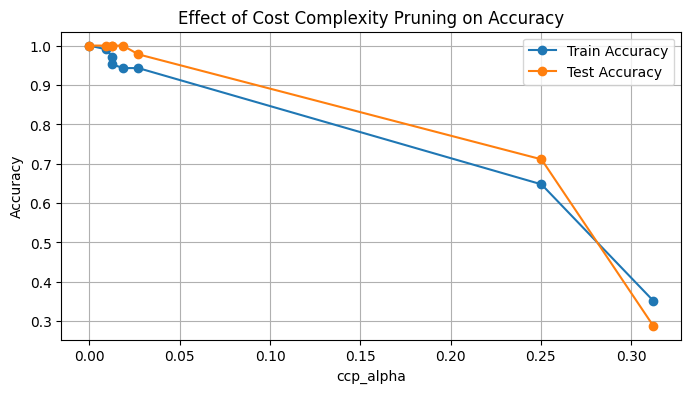

In [53]:
#27.Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load and split Iris (discrete labels)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# 2. Fit initial tree and get pruning path
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 3. For each alpha, train pruned tree and record accuracy
train_acc = []
test_acc  = []

for ccp in ccp_alphas:
    pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp)
    pruned.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, pruned.predict(X_train)))
    test_acc.append( accuracy_score(y_test,  pruned.predict(X_test)) )

# 4. Plot accuracy vs alpha
plt.figure(figsize=(8, 4))
plt.plot(ccp_alphas, train_acc, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_acc,  marker='o', label='Test Accuracy')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning on Accuracy")
plt.legend()
plt.grid(True)
plt.show()



In [55]:
#28.Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# 1. Load Iris and split into train/test (discrete class labels)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# 2. Train Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Predict on test set
y_pred = model.predict(X_test)

# 4. Evaluate with precision, recall, and F1-score (macro-averaged)
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall    (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score  (macro):", f1_score(y_test, y_pred, average='macro'))



Precision (macro): 1.0
Recall    (macro): 1.0
F1 Score  (macro): 1.0


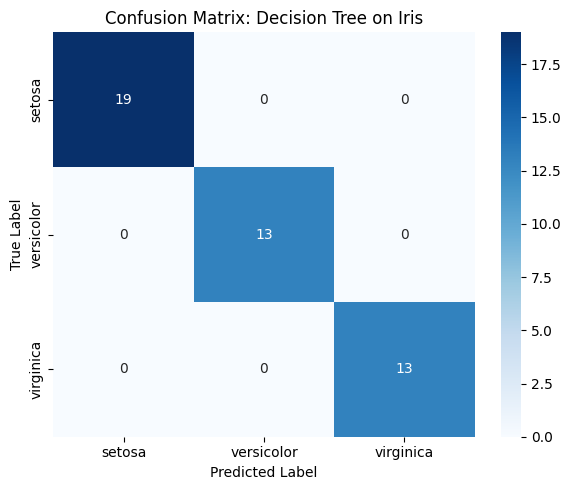

In [56]:
#29.Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Iris and split into train/test
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# 2. Train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = model.predict(X_test)

# 4. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 5. Plot with seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: Decision Tree on Iris")
plt.tight_layout()
plt.show()


In [57]:
#30.Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 1. Load Iris and split into train/test (discrete class labels)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# 2. Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}

# 3. Initialize GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,               # 5-fold CV
    scoring='accuracy'  # optimize for accuracy
)

# 4. Fit on the training data
grid_search.fit(X_train, y_train)

# 5. Output best parameters and best cross-val accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Val Accuracy: {:.3f}".format(grid_search.best_score_))


Best Parameters: {'max_depth': 4, 'min_samples_split': 10}
Best Cross-Val Accuracy: 0.943
